In [1]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv


--2024-07-23 02:17:02--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.06s   

2024-07-23 02:17:02 (1.17 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [2]:
import pandas as pd

df = pd.read_csv('FuelConsumption.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.corr(numeric_only = True)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


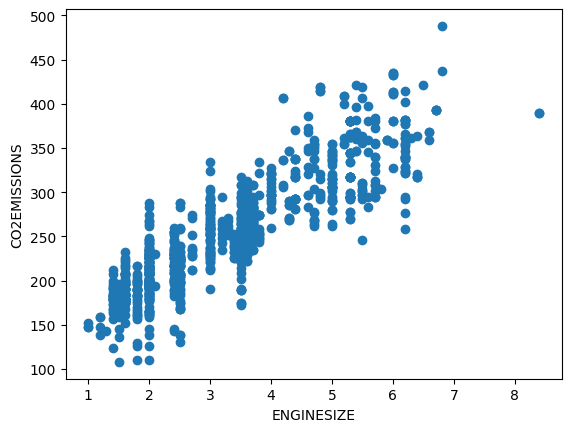

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [5]:
import numpy as np

msk = np.random.rand(len(df)) <0.75
train = df[msk]
test = df[~msk]

#**Polynomial Regression**

$$y = b + \theta\_1  x + \theta\_2 x^2$$

In [8]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#training the model

train_x = np.asanyarray(train[['ENGINESIZE']])    #asanyarray untuk convert to array
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)       #kalau tak mention degree, default is 2. the degree is the sensitivity of the curve. higher degree, higher sensitivity

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#prediction

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 Score is: ', (r2_score(test_y,test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 Score is:  77.2942214774815
The MSE is:  864.6034428273094


Text(0, 0.5, 'Emission')

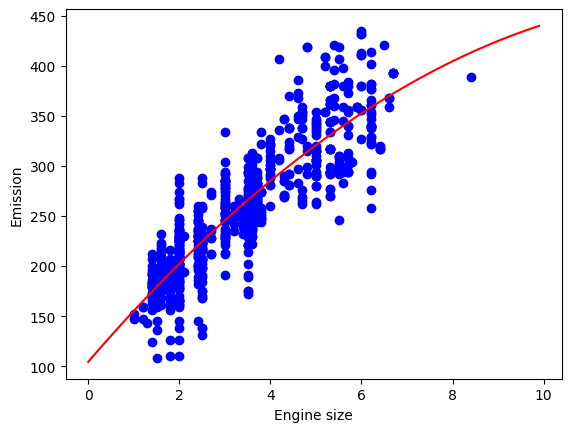

In [9]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [10]:
#training the model

poly4 = PolynomialFeatures(degree=4)

train_x_poly4 = poly4.fit_transform(train_x)

clf4 = linear_model.LinearRegression()

train_y_ = clf4.fit(train_x_poly4, train_y)

#prediction

test_x_poly4 = poly4.fit_transform(test_x)

test_y_ = clf4.predict(test_x_poly4)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 Score is: ', (r2_score(test_y,test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 Score is:  77.24199384211407
The MSE is:  866.5921961882489


Text(0, 0.5, 'Emission')

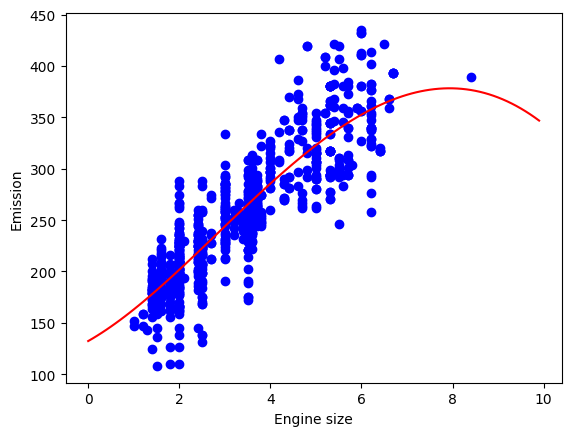

In [14]:
#now we put degree = 4. so according to the equation, adds 2 more coefficent to the equation. refer yy

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf4.intercept_[0]+ clf4.coef_[0][1]*XX+ clf4.coef_[0][2]*np.power(XX, 2) + clf4.coef_[0][3]*np.power(XX, 3) + clf4.coef_[0][4]*np.power(XX, 4)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [19]:
#training the model

train_x1 = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
train_y1 = np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)

train_x1_poly = poly.fit_transform(train_x1)

clf1 = linear_model.LinearRegression()

train_y1_ = clf1.fit(train_x1_poly, train_y1)

#prediction

test_x1 = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y1 = np.asanyarray(test[['CO2EMISSIONS']])

test_x1_poly = poly.fit_transform(test_x1)

test_y1_ = clf1.predict(test_x1_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 Score is: ', (r2_score(test_y1,test_y1_))*100)
print('The MSE is: ', np.mean((test_y1_ - test_y1)**2))

The R2 Score is:  83.79232287092024
The MSE is:  617.1650724126536


Text(0, 0.5, 'CO2EMISSIONS')

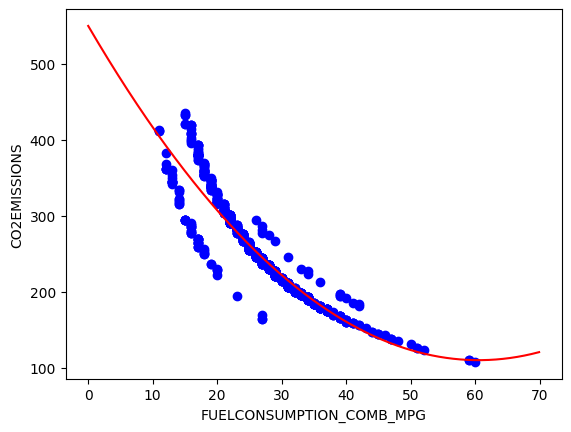

In [23]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 70.0, 0.1)
yy = clf1.intercept_[0]+ clf1.coef_[0][1]*XX+ clf1.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2EMISSIONS")

In [25]:
#training the model

poly_4 = PolynomialFeatures(degree=4)

train_x1_poly_4 = poly_4.fit_transform(train_x1)

clf_4 = linear_model.LinearRegression()

train_y1_ = clf_4.fit(train_x1_poly_4, train_y1)

#prediction

test_x1_poly_4 = poly_4.fit_transform(test_x1)

test_y1_ = clf_4.predict(test_x1_poly_4)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 Score is: ', (r2_score(test_y1,test_y1_))*100)
print('The MSE is: ', np.mean((test_y1_ - test_y1)**2))

The R2 Score is:  83.7012683549631
The MSE is:  620.6322976347901


Text(0, 0.5, 'CO2EMISSIONS')

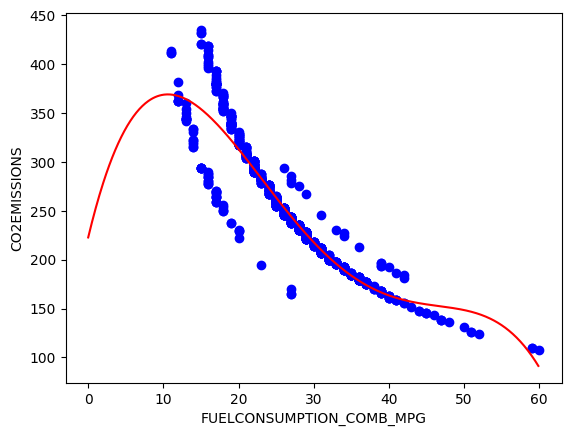

In [28]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf_4.intercept_[0]+ clf_4.coef_[0][1]*XX+ clf_4.coef_[0][2]*np.power(XX, 2) + clf_4.coef_[0][3]*np.power(XX, 3) + clf_4.coef_[0][4]*np.power(XX, 4)
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2EMISSIONS")

In [29]:
#training the model

poly5 = PolynomialFeatures(degree=5)

train_x1_poly5 = poly5.fit_transform(train_x1)

clf5 = linear_model.LinearRegression()

train_y1_ = clf5.fit(train_x1_poly5, train_y1)

#prediction

test_x1_poly5 = poly5.fit_transform(test_x1)

test_y1_ = clf5.predict(test_x1_poly5)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 Score is: ', (r2_score(test_y1,test_y1_))*100)
print('The MSE is: ', np.mean((test_y1_ - test_y1)**2))

The R2 Score is:  83.77941324585649
The MSE is:  617.6566523981032


Text(0, 0.5, 'CO2EMISSIONS')

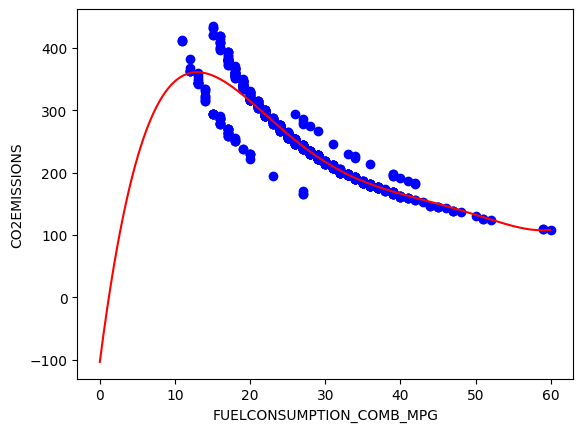

In [30]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf5.intercept_[0]+ clf5.coef_[0][1]*XX+ clf5.coef_[0][2]*np.power(XX, 2) + clf5.coef_[0][3]*np.power(XX, 3) + clf5.coef_[0][4]*np.power(XX, 4) + clf5.coef_[0][5]*np.power(XX, 5)
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2EMISSIONS")